# Part B (Neural Network from Scratch)

You need to implement a neural network from scratch .This is a multiclass classification problem. No. of hidden layers depends on you but should be atleast 2.Remember to use activation function. You can add any other function of your choice.

In [551]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [552]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [553]:
y=np.expand_dims(y,-1)
print(X.shape,y.shape)

(150, 4) (150, 1)


In [554]:
def parameters(n0,n1,n2,n3):
  # define the parameters of your nn initially using random lib.

  #n0 is the number of features,n1 and n2 are no. of neurons in the hidden layers and n3 is the number of neurons in the output layer
  w1=np.random.rand(n1,n0)*0.5
  b1=np.zeros((n1,1))

  w2=np.random.randn(n2,n1)*0.5
  b2=np.zeros((n2,1))

  w3=np.random.rand(n3,n2)*0.5
  b3=np.zeros((n3,1))

  parameters={'w1':w1,"b1":b1,'w2':w2,"b2":b2,'w3':w3,"b3":b3}


  return parameters

In [555]:
#activation functions
def sigmoid(z):
    return 1/(1+np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)


In [556]:
def forward(x,parameters):
    # function for forward propagation

    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    w3=parameters['w3']
    b3=parameters['b3']

    z1=np.dot(w1,x)+b1
    a1=relu(z1)

    z2=np.dot(w2,a1)+b2
    a2=relu(z2)

    z3=np.dot(w3,a2)+b3
    a3=softmax(z3)

    forward_parameters={'z1':z1,'a1':a1,'z2':z2,'a2':a2,'z3':z3,'a3':a3}

    return forward_parameters



In [557]:
def cross_entropy_loss(y_pred, y_true):
    m = y_true.shape[1]
    return -np.sum(y_true * np.log(y_pred)) / m


In [558]:
# use Gradient descent as of now as an optimizer

In [559]:
def backward(x,y,parameters,forward_parameters):
  # function for backward propagation
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    w3=parameters['w3']
    b3=parameters['b3']

    z1=forward_parameters['z1']
    a1=forward_parameters['a1']
    z2=forward_parameters['z2']
    a2=forward_parameters['a2']
    z3=forward_parameters['z3']
    a3=forward_parameters['a3']

    m=x.shape[1]

    dz3=a3-y
    dw3=np.dot(dz3,a2.T)/m
    db3=np.sum(dz3,axis=1,keepdims=True)*(1/m)

    def der_relu(x):
      return np.array(x>0).astype(float)

    dz2=np.dot(w3.T,dz3)*(der_relu(z2))
    dw2=np.dot(dz2,a1.T)/m
    db2=np.sum(dz2,axis=1,keepdims=True)*(1/m)

    dz1=np.dot(w2.T,dz2)*(der_relu(z1))
    dw1=np.dot(dz1,x.T)/m
    db1=np.sum(dz1,axis=1,keepdims=True)*(1/m)

    gradients={'dw1':dw1,'db1':db1,'dw2':dw2,'db2':db2,'dw3':dw3,'db3':db3}


    return gradients

In [560]:
def update_parameters(parameters,gradients,lr):
    #FUNCTION TO UPDATE PARAMETERS USING GD
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    w3=parameters['w3']
    b3=parameters['b3']

    dw1=gradients['dw1']
    db1=gradients['db1']
    dw2=gradients['dw2']
    db2=gradients['db2']
    dw3=gradients['dw3']
    db3=gradients['db3']

    w1=w1-lr*dw1
    b1=b1-lr*db1
    w2=w2-lr*dw2
    b2=b2-lr*db2
    w3=w3-lr*dw3
    b3=b3-lr*db3

    parameters={'w1':w1,"b1":b1,'w2':w2,"b2":b2,'w3':w3,"b3":b3}

    return parameters

In [561]:
def model(x,y,n1,n2,lr,iterations):
  #function to train and build the whole model

  n0=X.shape[0]#no.of features
  n3=y.shape[0] #output softmax layer- classification in 3 classes(0,1,2)
  #n1 and n2 are hidden layer units

  params=parameters(n0,n1,n2,n3)
  loss_list=[]

  for i in range(iterations):

    forward_param=forward(x,params)
    a3=forward_param['a3']
    loss=cross_entropy_loss(a3,y)
    gradients=backward(x,y,params,forward_param)
    params=update_parameters(params,gradients,lr)
    loss_list.append(loss)

    if (i%(iterations//10)==0):
      print(f'loss after {i} iterations is {loss}')

  return params,loss_list




In [562]:
X=X.T
y=y.T
print(X.shape,y.shape)

(4, 150) (1, 150)


In [563]:
#one hot encoding
num_classes = np.max(y) + 1
num_examples = y.shape[1]
y_one_hot = np.zeros((num_examples,num_classes))
for i in range(num_examples):
    class_index = y[0, i]
    y_one_hot[i,class_index] = 1



In [564]:
print(X.shape, y_one_hot.shape)

(4, 150) (150, 3)


In [565]:
#write down the predictions and the f1 score finally

n1=32
n2=64
lr=0.01
iterations=1500

params,loss_list=model(X,y_one_hot.T,n1,n2,lr,iterations)


loss after 0 iterations is 2.5380062253428033
loss after 150 iterations is 0.3657184014635092
loss after 300 iterations is 0.18688835067070153
loss after 450 iterations is 0.11967069598964171
loss after 600 iterations is 0.09796240138174912
loss after 750 iterations is 0.08682732349436093
loss after 900 iterations is 0.07997594943390376
loss after 1050 iterations is 0.07538561779111497
loss after 1200 iterations is 0.0720778537670449
loss after 1350 iterations is 0.06957704903574663


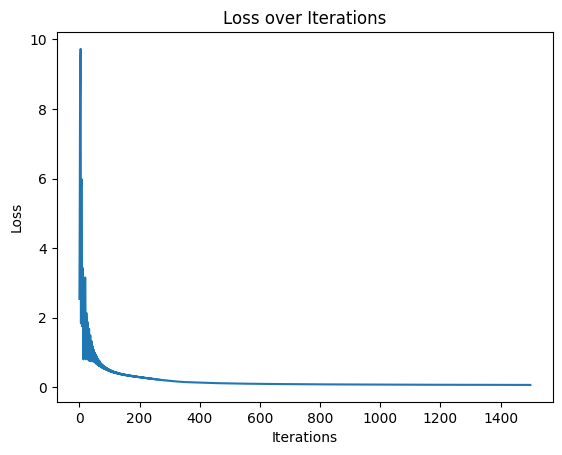

In [566]:

plt.plot(loss_list)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

In [567]:
def predict(X, parameters):
    pred= forward(X, parameters)

    predictions = np.argmax(pred['a3'], axis=0)
    return predictions

predictions=predict(X,params)


print(predictions)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [568]:
print(np.squeeze(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [569]:
from sklearn.metrics import f1_score
f1 = f1_score(np.squeeze(y), predictions, average = 'macro')
print(f"F1 Score: {f1}")

F1 Score: 0.9799819837854069
